#### Importing needful libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
from pyspark.ml import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [2]:
data= pd.read_csv("titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


You got more détail on each column there :
- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- boat - Lifeboat (if survived)
- body - Body number (if did not survive and body was recovered)

#**PREPROCESS DATA CLEAN DATA**

Print Shemas of dataframe

In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#data = data.dropna() removing all the null values from the dataset
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Count the number of total passenger in the titanic

In [8]:
len(data)  # total number of rows in the dataset after removing null values


891

In [39]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Viewing few rows (5)

In [40]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Summary of data, display descriptive statistic of our dataframe

In [9]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


###### selecting few features and check the data

In [4]:
features = ["Pclass", "Survived", "Embarked"]
X = data[features]
X
#Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
#Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
# Survival (0 = No; 1 = Yes)

,Pclass,Survived,Embarked
0,3,0,S
1,1,1,C
2,3,1,S
3,1,1,S
4,3,0,S
...,...,...,...
886,2,0,S
887,1,1,S
888,3,0,S
889,1,1,C


### Let's do some simple exploratory data analysis (EDA)

In [10]:
data.shape

(891, 12)

In [12]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
survived_count = (data["Survived"] == 1).sum()  #getting the count of passengers who survived
survived_count


np.int64(342)

In [6]:
data[data["Survived"] == 1].groupby("Pclass").size()



Pclass
1    136
2     87
3    119
dtype: int64

Out of 891 passengers in dataset, only about 342 survived.

###### To know the particulars about survivors we have to explore more of the data.
###### The survival rate can be determined by different features of the dataset such as Sex, Port of Embarcation, Age; few to be mentioned.

Checking survival rate by Sex

In [7]:
survived = data[data["Survived"] == 1]
survived.groupby("Sex").size()  # survived people grouped by the sex of the passengers


Sex
female    233
male      109
dtype: int64

conclude of what we can observe there

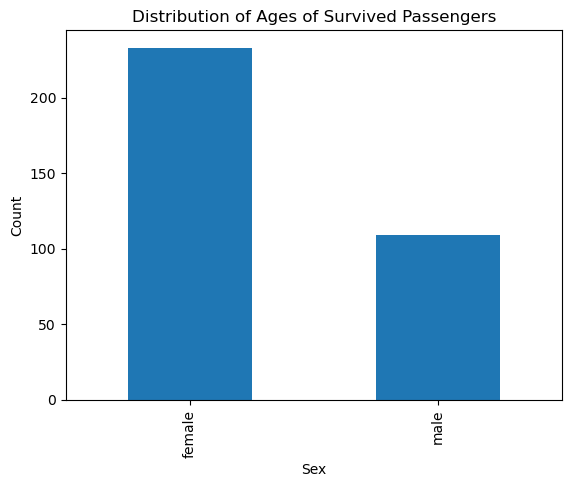

In [8]:
survived["Sex"].value_counts().plot(kind="bar")

plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Distribution of Ages of Survived Passengers")
plt.show()


###### Here it can be seen that the Pclass1 people were given priority to pclass3 people, even though
We can clearly see that Passenegers Of Pclass 1 were given a very high priority while rescue. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low.

# Checking Null values

How many null values there are for each columns ?

In [15]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

what is the mean age of total passenger, dead and surviving passenger ?

In [9]:
mean_age= data["Age"].mean()
mean_dead= data[data["Survived"] == 0]["Age"].mean()
mean_survived= data[data["Survived"] == 1]["Age"].mean()
print("Mean Age of all passengers:", mean_age)
print("Mean Age of passengers who died:", mean_dead)
print("Mean Age of passengers who survived:", mean_survived)

Mean Age of all passengers: 29.69911764705882
Mean Age of passengers who died: 30.62617924528302
Mean Age of passengers who survived: 28.343689655172415


To replace these NaN values, we can assign them the mean age of the dataset. But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years.

We can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups



Using the Regex ""[A-Za-z]+)." extract the initials from the Name. It looks for strings which lie between A-Z or a-z and followed by a .(dot). and create a column named Initial (Mr, mrs, miss etc from Name)

In [10]:
data["Initial"] = data["Name"].str.extract(r"([A-Za-z]+)\.", expand=False)
data["Age"] = data["Age"].fillna(data.groupby("Initial")["Age"].transform("mean"))
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Initial          0
dtype: int64

In [23]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C,Mr


Display all DISTINCT initial

In [11]:
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

There are some misspelled Initials like Mlle, Mme,  that stand for Miss. replace them with Miss and same thing for other values.
Like Capt, Sir, Don = Mr, 

in Output of Initial we would like to have only few variables (|   Miss|
|  Other|
| Master|
|     Mr|
|    Mrs)

In [12]:
data["Initial"] = data["Initial"].replace(["Mlle", "Ms","Mme"], "Miss")
data["Initial"] = data["Initial"].replace(["Capt", "Sir", "Don"], "Mr")
data["Initial"].unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr', 'Major', 'Lady', 'Col',
       'Countess', 'Jonkheer'], dtype=object)

In [13]:
rare_titles = ["Rev", "Dr", "Major", "Lady", "Col", "Countess", "Jonkheer"]
data["Initial"] = data["Initial"].replace(rare_titles, "Other")
data["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

Print distinct Initial now

In [14]:
data["Initial"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

lets check the average age by Initials

In [15]:
data.groupby("Initial")["Age"].mean()


Initial
Master     4.574167
Miss      21.843350
Mr        32.487121
Mrs       35.898148
Other     44.250000
Name: Age, dtype: float64

Let's impute missing values in age feature based on average age of Initials  
USE SQL, pyspark or spark sql to do that  
Here a exemple that could provide some ideas :  

titanic_df = titanic_df.withColumn("Age",when((titanic_df[columns] == "string") & (titanic_df[column].isNull()), 22).otherwise(titanic_df["Age"]))

In [16]:
data['Age'].isnull().sum()

np.int64(0)

Check the imputation

In [24]:
data.Age.describe()

count    891.000000
mean      29.754659
std       13.277179
min        0.420000
25%       21.773973
50%       30.000000
75%       35.898148
max       80.000000
Name: Age, dtype: float64

**Q : Embarked feature has only two missining values. Let's check values within Embarked**

In [17]:
null_embarked = data[data["Embarked"].isna()]
null_embarked


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN,Miss
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN,Mrs


Majority Passengers boarded from "S". We can impute with "S"

**Q : Replace na by a "S" in the Embarked column**

In [18]:
max_emb= data["Embarked"].value_counts().idxmax()
max_emb  # this gives "S" as the most common values in the "Embarked" column
data["Embarked"] = data["Embarked"].fillna(max_emb)
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Initial          0
dtype: int64

**Q : We can drop Cabin features as it has lots of null values**

In [19]:
data= data.drop(columns=['Cabin'])
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Other
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr


**Q : We can create a new feature called "Family_size"  and analyse it. This feature is the summation of Parch(parents/children) and SibSp(siblings/spouses). It gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers**

Text(0, 0.5, 'Survival Rate')

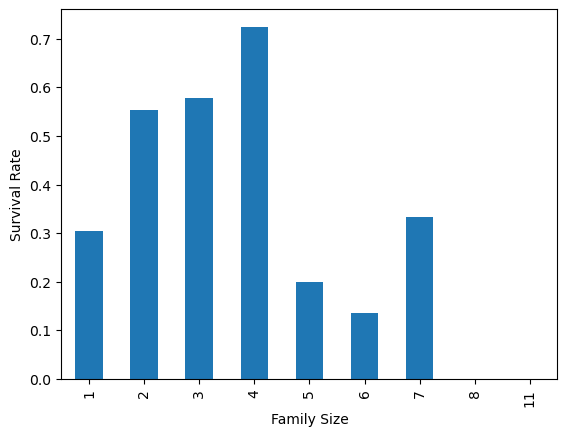

In [20]:
data["Family_size"] = data["SibSp"] + data["Parch"] + 1 #adding 1 to include the passenger themselves in the family size calculation
data.groupby("Family_size")["Survived"].mean().plot(kind="bar")
plt.xlabel("Family Size")
plt.ylabel("Survival Rate") 

In [37]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initial,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,Mr,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,Mr,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,Other,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,Miss,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21.773973,1,2,W./C. 6607,23.4500,S,Miss,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,Mr,1


**Q : Count the number groupby family_size**

In [21]:
data.groupby("Family_size").size()  #getting the count of passengers for each family size category

Family_size
1     537
2     161
3     102
4      29
5      15
6      22
7      12
8       6
11      7
dtype: int64

**Q : Create a new feature called "ALONE" and analyse it, in that feature, it should be a booleein, like if there is a family_size > 1, then alone == 0, else 1**

In [22]:
data['Alone']= data['Family_size'].apply(lambda x: 0 if x > 1 else 1)  #creating a new column "Alone" where 1 indicates the passenger is alone and 0 indicates they are not alone
data['Alone'].value_counts()

Alone
1    537
0    354
Name: count, dtype: int64

Lets convert Sex, Embarked & Initial columns from string to number using StringIndexer


In [ ]:
data["Sex_index"] = data["Sex"].astype("category").cat.codes
data["Embarked_index"] = data["Embarked"].astype("category").cat.codes
data["Initial_index"] = data["Initial"].astype("category").cat.codes  

# usin only with the features that are relevant for the model of the panda, cant use the spark as its taking too long to debug in my case 


###### Drop columns which are not required to predictiv model of surviving

In [32]:
data.drop(columns=["Sex", "Embarked", "Initial"], inplace=True)
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Alone,Sex_index,Embarked_index,Initial_index
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,2,0,1,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,2,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,1,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,2,0,0,2,3
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,1,1,2,4
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,1,0,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.773973,1,2,W./C. 6607,23.4500,4,0,0,2,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,1,1,0,2


# **PREPROCESS DATA TO INPUT MODEL**


Let's put all features into vector

there is a example of what you should do, there it's for numericals variables only, if you took categoricals in X, let's check in the documentation how you can do :)

In [33]:
data

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Family_size,Alone,Sex_index,Embarked_index,Initial_index
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,2,0,1,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,2,0,0,0,3
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,1,1,0,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,2,0,0,2,3
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,1,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,1,1,1,2,4
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,1,1,0,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",21.773973,1,2,W./C. 6607,23.4500,4,0,0,2,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,1,1,1,0,2


In [46]:
features = ["Pclass","Age", "SibSp", "Parch","Fare","Family_size", "Alone", "Sex_index", "Embarked_index", "Initial_index"]
X = data[features]
y = data["Survived"]
#Creating features of all the input (x) and the target variable (y) for the machine learning model. The features include passenger
#  class, age, fare, number of siblings/spouses aboard, number of parents/children aboard, family size, whether the passenger
# is alone, sex, embarked port, and initial (title).

In [47]:
X.shape

(891, 10)

In [48]:
y.shape

(891,)

Now that the data is all set, let's split it into training and test. I'll be using 80% of it.

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y  # keeps same survived ratio in train/test
)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(712, 10) (179, 10)
(712,) (179,)


# **Modelling**

## Here is the list of few Classification Algorithms from Spark ML 

* LogisticRegression
* DecisionTreeClassifier
* RandomForestClassifier
* Gradient-boosted tree classifier
* NaiveBayes
* Support Vector Machine

In [54]:
def evaluate(model, X_test, y_test, name="model"):
    y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
  #  print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
    #print("Report:\n", classification_report(y_test, y_pred))

## LogisticRegression

In [56]:
lr = LogisticRegression(max_iter=2000)
lr.fit(X_train, y_train)



,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,2000
,multi_class,'deprecated'


## Evaluating accuracy of LogisticRegression.

In [57]:
evaluate(lr, X_test, y_test, "Logistic Regression")


=== Logistic Regression ===
Accuracy: 0.7932960893854749


## DecisionTreeClassifier

In [60]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)



,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


## Evaluating accuracy of DecisionTreeClassifier.

In [61]:
evaluate(dt, X_test, y_test, "Decision Tree")


=== Decision Tree ===
Accuracy: 0.7541899441340782


## RandomForestClassifier

In [63]:
rfc=RandomForestClassifier(n_estimators=300, random_state=42)
rfc.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


## Evaluating accuracy of RandomForestClassifier.

In [64]:
evaluate(rfc, X_test, y_test, "Random Forest Classifier")


=== Random Forest Classifier ===
Accuracy: 0.8044692737430168


## Gradient-boosted tree classifier

In [66]:
gbt = GradientBoostingClassifier(random_state=42)
gbt.fit(X_train, y_train)


,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


## Evaluate accuracy of Gradient-boosted.

In [67]:

evaluate(gbt, X_test, y_test, "Gradient Boosting")


=== Gradient Boosting ===
Accuracy: 0.8044692737430168


## NaiveBayes

In [69]:
nb = GaussianNB()
nb.fit(X_train, y_train)



,priors,None
,var_smoothing,1e-09


## Evaluating accuracy of NaiveBayes.

In [70]:
evaluate(nb, X_test, y_test, "Naive Bayes (Gaussian)")


=== Naive Bayes (Gaussian) ===
Accuracy: 0.7932960893854749


## Support Vector Machine

In [72]:
svm = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", random_state=42)
)

svm.fit(X_train, y_train)



,steps,"[('standardscaler', ...), ('svc', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'


## Evaluating the accuracy of Support Vector Machine.

In [73]:
evaluate(svm, X_test, y_test, "SVM (RBF)")


=== SVM (RBF) ===
Accuracy: 0.8379888268156425


# Do more : How to increase accuracy of a model?

  * Add new features or drop existing features and train model.
  * Tune ML algorithm (https://spark.apache.org/docs/latest/ml-tuning.html)

**REFER TO THE SUPPORT DOCUMENT**